In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import os

from PIL import Image
import glob

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [2]:
def resize_images(img_path):
    images=glob.glob(img_path + "/*.png")  
    
    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "PNG")
    
    print(len(images), " images resized.")

In [3]:
image_dir_path = "C:/Users/USER/Desktop/aiffel/rock_scissor_paper/train/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

1000  images to be resized.
1000  images resized.
가위 이미지 resize 완료!


In [4]:
image_dir_path = "C:/Users/USER/Desktop/aiffel/rock_scissor_paper/train/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

1000  images to be resized.
1000  images resized.
바위 이미지 resize 완료!


In [5]:
image_dir_path = "C:/Users/USER/Desktop/aiffel/rock_scissor_paper/train/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

1000  images to be resized.
1000  images resized.
보 이미지 resize 완료!


In [6]:
def load_data(img_path, number_of_data=3000):  
    # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=4
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.png'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.png'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.png'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = "C:/Users/USER/Desktop/aiffel/rock_scissor_paper/train"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 3000 입니다.
x_train shape: (3000, 28, 28, 4)
y_train shape: (3000,)


라벨:  0


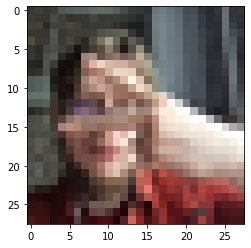

In [7]:
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

In [18]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,4)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

Model에 추가된 Layer 개수:  7


In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 16)        592       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense_2 (Dense)             (None, 64)               

In [20]:
image_dir_path = "C:/Users/USER/Desktop/aiffel/rock_scissor_paper/test/scissor"
resize_images(image_dir_path)

images=glob.glob(image_dir_path + "/*.png")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"PNG")

print("가위 이미지 resize 완료!")

# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "C:/Users/USER/Desktop/aiffel/rock_scissor_paper/test/rock"
resize_images(image_dir_path)

images=glob.glob(image_dir_path + "/*.png")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"PNG")

print("바위 이미지 resize 완료!")

# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "C:/Users/USER/Desktop/aiffel/rock_scissor_paper/test/paper"
resize_images(image_dir_path)

images=glob.glob(image_dir_path + "/*.png")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"PNG")

print("보 이미지 resize 완료!")

200  images to be resized.
200  images resized.
가위 이미지 resize 완료!
200  images to be resized.
200  images resized.
바위 이미지 resize 완료!
200  images to be resized.
200  images resized.
보 이미지 resize 완료!


In [21]:
def load_data2(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=600   # 가위바위보 이미지 개수 총합
    img_size=28
    color=4
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.png'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.png'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper/*.png'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_test)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

image_dir_path = "C:/Users/USER/Desktop/aiffel/rock_scissor_paper/test"
(x_test, y_test)=load_data2(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_test)의 이미지 개수는 600 입니다.
x_test shape: (600, 28, 28, 4)
y_test shape: (600,)


In [22]:
print("Before Reshape - x_train_norm shape: {}".format(x_train_norm.shape))
print("Before Reshape - x_test_norm shape: {}".format(x_test_norm.shape))

x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 4)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산
x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 4)

print("After Reshape - x_train_reshaped shape: {}".format(x_train_reshaped.shape))
print("After Reshape - x_test_reshaped shape: {}".format(x_test_reshaped.shape))

Before Reshape - x_train_norm shape: (3000, 28, 28, 4)
Before Reshape - x_test_norm shape: (600, 28, 28, 4)
After Reshape - x_train_reshaped shape: (3000, 28, 28, 4)
After Reshape - x_test_reshaped shape: (600, 28, 28, 4)


In [27]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)

Epoch 1/10
94/94 [==============================] - ETA: 0s - loss: 0.0574 - accuracy: 0.98 - 1s 7ms/step - loss: 0.0557 - accuracy: 0.9823
Epoch 2/10
94/94 [==============================] - 1s 7ms/step - loss: 0.0348 - accuracy: 0.9880
Epoch 3/10
94/94 [==============================] - 1s 7ms/step - loss: 0.0726 - accuracy: 0.9793
Epoch 4/10
94/94 [==============================] - 1s 7ms/step - loss: 0.0098 - accuracy: 0.9960
Epoch 5/10
94/94 [==============================] - 1s 7ms/step - loss: 0.0049 - accuracy: 0.9987
Epoch 6/10
94/94 [==============================] - 1s 7ms/step - loss: 0.0212 - accuracy: 0.9910
Epoch 7/10
94/94 [==============================] - 1s 7ms/step - loss: 0.0694 - accuracy: 0.9773
Epoch 8/10
94/94 [==============================] - 1s 7ms/step - loss: 0.0371 - accuracy: 0.9897
Epoch 9/10
94/94 [==============================] - 1s 7ms/step - loss: 0.0081 - accuracy: 0.9967
Epoch 10/10
94/94 [==============================] - 1s 8ms/step - loss: 0.0

In [28]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

19/19 - 0s - loss: 2.3503 - accuracy: 0.6683 - 214ms/epoch - 11ms/step
test_loss: 2.350292444229126 
test_accuracy: 0.6683333516120911


In [29]:
predicted_result = model.predict(x_test_reshaped)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [0.32510647 0.3248059  0.35008767]
model이 추론한 가장 가능성이 높은 결과 :  2
실제 데이터의 라벨 :  0


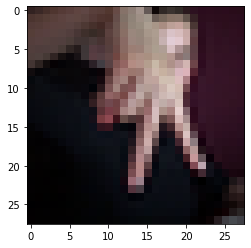

In [30]:
plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

예측확률분포: [0.31620994 0.3274816  0.35630843]
라벨: 1, 예측결과: 2


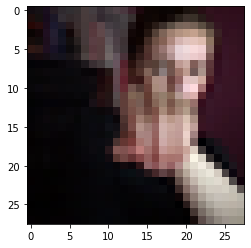

예측확률분포: [0.32282996 0.3251076  0.35206237]
라벨: 1, 예측결과: 2


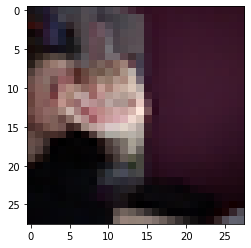

예측확률분포: [0.31925267 0.3278651  0.35288224]
라벨: 1, 예측결과: 2


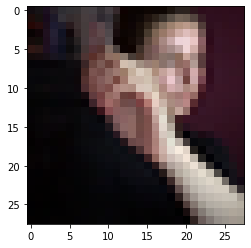

예측확률분포: [0.321375   0.3294425  0.34918246]
라벨: 1, 예측결과: 2


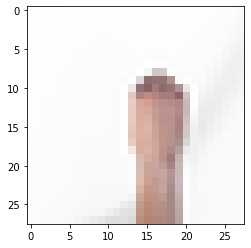

예측확률분포: [0.3416104  0.31116393 0.3472257 ]
라벨: 0, 예측결과: 2


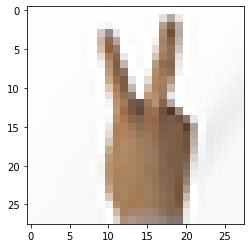

In [31]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤으로 5개
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

<프로젝트 회고> <br><br>
이번 프로젝트는 가위바위보 이미지를 분류하는 모델이었다. 단순히 이미지를 세 가지로 분류하는 작업이었기에 쉽게 진행될 줄 알았는데 아니었다. 처음 모델을 만들고 테스트를 해보았을 때의 test_accuracy는 0.4를 겨우 넘긴 수준이었다. <br><br>
<하이퍼 파라미터 수정하기><br><br>
Conv2D와 Dense 레이어의 인자들을 수정해보기로 했다. 나는 높은 값을 입력할 수록 당연히 성능이 좋아질 것이라 생각했다. 하지만 여러 값들을 넣어보고 비교해본 결과 모델마다 적절한 값들이 존재한다는 것을 알게 되었다. 처음으로 수정한 값으로는 Conv2D에는 32, 64를 넣어주었고 Dense에는 128을 넣어주었다. test_accuracy는 0.48까지 올라갔다.
<br><br>
<train data 늘리기><br><br>
train dataset와 test dataset는 보통 8:2로 맞춘다고 했는데 나의 모델은 1:1이었다. train data로 가위, 바위, 보 각각 200개의 이미지를 가져왔고 test data도 마찬가지였다. 총 1200개의 이미지였기에 충분하다고 생각했지만 test data를 분류하기에 train data가 너무 적게 학습되었다는 것을 알았다. 지금의 data들로 8:2 비율을 맞출 수도 있지만 train data를 늘려 성능을 더 높이고 싶었다. 그래서 새로운 이미지를 각각 800개씩 추가하여 1000개로 맞추었다. test_accuracy는 0.55까지 올랐다.<br><br>
<epoch 수정하기><br><br>
epoch를 수정하면 어떻게 될지 궁금해서 수정해보았다. epoch를 낮출수록 정확도가 낮아졌다. 노드에서는 epoch가 높아질수록 인식률의 상승이 미미하니 10epoch 정도로 학습하면 된다고 나와있었다. 10epoch보다 높아져도 정확도에는 크게 영향을 주지 않는다는 의미로 해석했는데 내가 수정했을 때는 정확도가 점점 떨어지는 것을 확인할 수 있었다. 물론 학습할 때마다 인식 정확도는 다르게 나오지만 실행할 때마다 결과가 내 예상과는 다르게 성능이 감소했다. 제대로 이해하기 위해 이 부분은 좀 더 깊게 공부해볼 필요가 있는 것 같다.<br><br>
<하이퍼 파라미터 다시 수정하기><br><br>
데이터의 양이 달라져서 Conv2D와 Dense 레이어의 인자들을 다시 수정해주었다. 여러 값들을 넣어 본 결과 Conv2D에는 16, 32가 적절했고 Dense에는 64가 적절한 값임을 찾았다. 실행할 때마다 정확도가 계속 다르게 나오긴 했지만 내가 목표로 하는 정확도인 0.6을 계속 넘는 것을 확인했다. <br><br>
비록 내가 원하는 만큼의 정확도를 얻지는 못했지만 목표로 하는 정확도를 얻기 위해 수많은 수정을 거치면서 많이 배우게 된 것 같다. 틀리게 분류한 이미지들을 보니 대부분의 이미지들을 보로 분류하였다. 데이터의 질이 좋지 않은 것이 원인이라고 생각했고 이를 해결하기 위해서는 더 많고 질 좋은 데이터들을 학습시켜야 할 것 같다. 다음에는 픽셀도 수정해서 한번 모델링을 해보고 싶다.